### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [6]:
tf.keras.utils.to_categorical(
    trainY,
    num_classes=None,
    dtype='float32'
)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
tf.keras.utils.to_categorical(
    testY,
    num_classes=None,
    dtype='float32'
)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

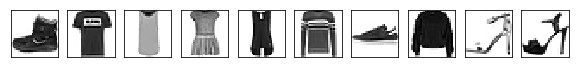

label for each of the above image:
9 0 0 3 0 2 7 2 5 5


In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
plt.show()

print ('label for each of the above image:')
print(*trainY[0:10])
    

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Execute the model using model.fit()

In [13]:
model.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 41us/sample - loss: 14.4844 - acc: 0.1013
Epoch 2/5
60000/60000 [==============================] - 2s 39us/sample - loss: 14.5063 - acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 14.5063 - acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 14.5063 - acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 14.5063 - acc: 0.1000


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.BatchNormalization(input_shape=(10,)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model

In [15]:
model.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5946 - acc: 0.7959
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4894 - acc: 0.8312
Epoch 3/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4696 - acc: 0.8374
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4571 - acc: 0.8421
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4471 - acc: 0.8454


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [16]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.001)

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.BatchNormalization(input_shape=(10,)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5989 - acc: 0.7934
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4921 - acc: 0.8307
Epoch 3/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4708 - acc: 0.8378
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4569 - acc: 0.8430
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4503 - acc: 0.8445


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [19]:
sgd = optimizers.SGD(lr=0.03)

In [36]:
a = np.arange(0,10.0)
a

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.BatchNormalization(input_shape=(10,)),
    tf.keras.layers.Dense(100, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.fit(trainX, trainY, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3216 - acc: 0.8831
Epoch 2/15
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3188 - acc: 0.8835
Epoch 3/15
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3125 - acc: 0.8864
Epoch 4/15
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3077 - acc: 0.8875
Epoch 5/15
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3032 - acc: 0.8878
Epoch 6/15
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2983 - acc: 0.8910
Epoch 7/15
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2921 - acc: 0.8939
Epoch 8/15
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2873 - acc: 0.8943
Epoch 9/15
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2841 - acc: 0.8955
Epoch 10/15
60000/60000 [==============================] - 6s 94us/sample - loss:

## Review model

In [47]:
test_loss, test_acc = model.evaluate(testX, testY)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3613 - acc: 0.8743
Test accuracy: 0.8743


### Run the model

In [48]:
predictions = model.predict(testX)

In [49]:
predictions[0]

array([4.1441510e-07, 1.5125577e-06, 6.5201280e-06, 8.1957450e-07,
       5.3451714e-07, 7.6359031e-03, 1.4661673e-05, 1.4239932e-02,
       3.1949926e-04, 9.7778016e-01], dtype=float32)

In [50]:
np.argmax(predictions[0])

9

In [51]:
testY[0]

9

In [52]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

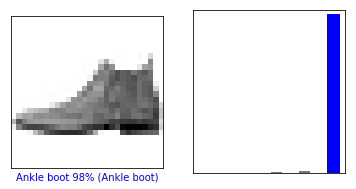

In [53]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, testY, testX)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  testY)
plt.show()

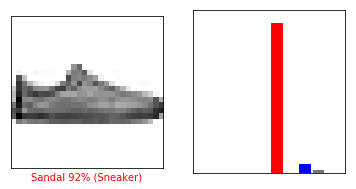

In [54]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, testY, testX)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  testY)
plt.show()

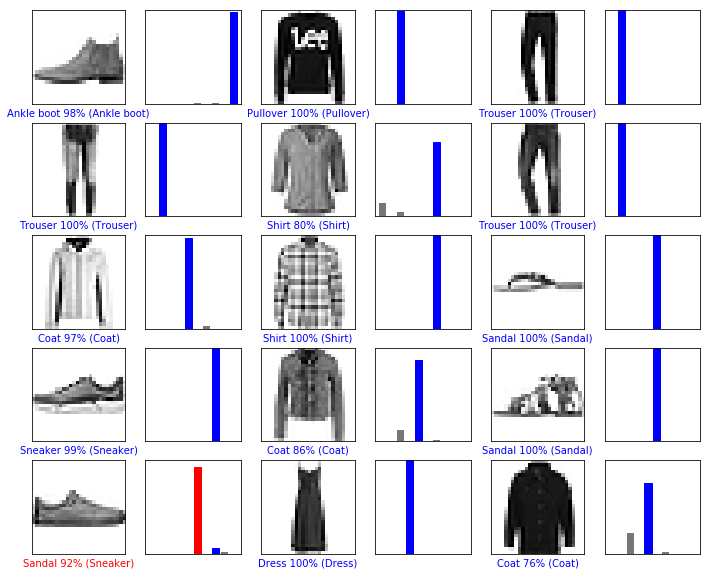

In [55]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, testY, testX)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, testY)
plt.show()